***
# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 1</font>
***

## Trabalho de Análise Descritiva de um Conjunto de Dados

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE. 

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Utilize as células abaixo para importar as bibliotecas que precisar e para configurações gerais
#### <font color='red'>Sugestões: dplyr, ggplot2 etc.</font>

In [ ]:
library(ggplot2)
library(dplyr)

In [ ]:
options(repr.plot.width = 9, repr.plot.height = 6)
formatos <- theme(
        plot.title=element_text(size = 14, hjust = 0.5),
        axis.title.y=element_text(size = 12, vjust = +0.2),
        axis.title.x=element_text(size = 12, vjust = -0.2),
        axis.text.y=element_text(size = 10),
        axis.text.x=element_text(size = 10)
    )

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [ ]:
dados <- read.csv("dados.csv")

### Visualize o conteúdo do DataFrame

In [ ]:
head(dados)

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura
,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,11,0,23,8,12,800,1.603808
2,11,1,23,2,12,1150,1.739790
3,11,1,35,8,15,880,1.760444
4,11,0,46,2,6,3500,1.783158
5,11,1,47,8,9,150,1.690631
6,11,1,34,8,12,790,1.637906


### Para avaliar o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

### 1º Definir os intevalos das classes em reais (R$)

In [ ]:
salario_minimo = 788
classes = c(
  min(dados$Renda),
  2*salario_minimo,
  5*salario_minimo,
  15*salario_minimo,
  25*salario_minimo, 
  max(dados$Renda))
classes

[1]      0   1576   3940  11820  19700 200000

### 2º Definir os labels das classes

In [ ]:
labels = c("E", "D", "C", "B", "A")
labels

[1] "E" "D" "C" "B" "A"

### 3º Construir a coluna de frequências

In [ ]:
frequencia = table(
  cut(
    x = dados$Renda,
    breaks = classes,
    labels = labels,
    include.lowest = TRUE
  )
)
frequencia


    E     D     C     B     A 
49755 18602  7241   822   420 

### 4º Construir a coluna de percentuais

In [ ]:
percentual = prop.table(frequencia) * 100
percentual 


         E          D          C          B          A 
64.7514315 24.2087454  9.4234774  1.0697553  0.5465903 

### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [ ]:
renda = cbind(Frequencia = frequencia, Percentual = percentual)
renda

,Frequencia,Percentual
E,49755,64.7514315
D,18602,24.2087454
C,7241,9.4234774
B,822,1.0697553
A,420,0.5465903


In [ ]:
renda = renda[order(rownames(renda)), ]
renda

,Frequencia,Percentual
A,420,0.5465903
B,822,1.0697553
C,7241,9.4234774
D,18602,24.2087454
E,49755,64.7514315


### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

#### <font color='red'>Lembre-se de transformar a matriz de resultados em um data frame.</font>

In [ ]:
bar_chart = data.frame(renda)
bar_chart

,Frequencia,Percentual
,<dbl>,<dbl>
A,420,0.5465903
B,822,1.0697553
C,7241,9.4234774
D,18602,24.2087454
E,49755,64.7514315


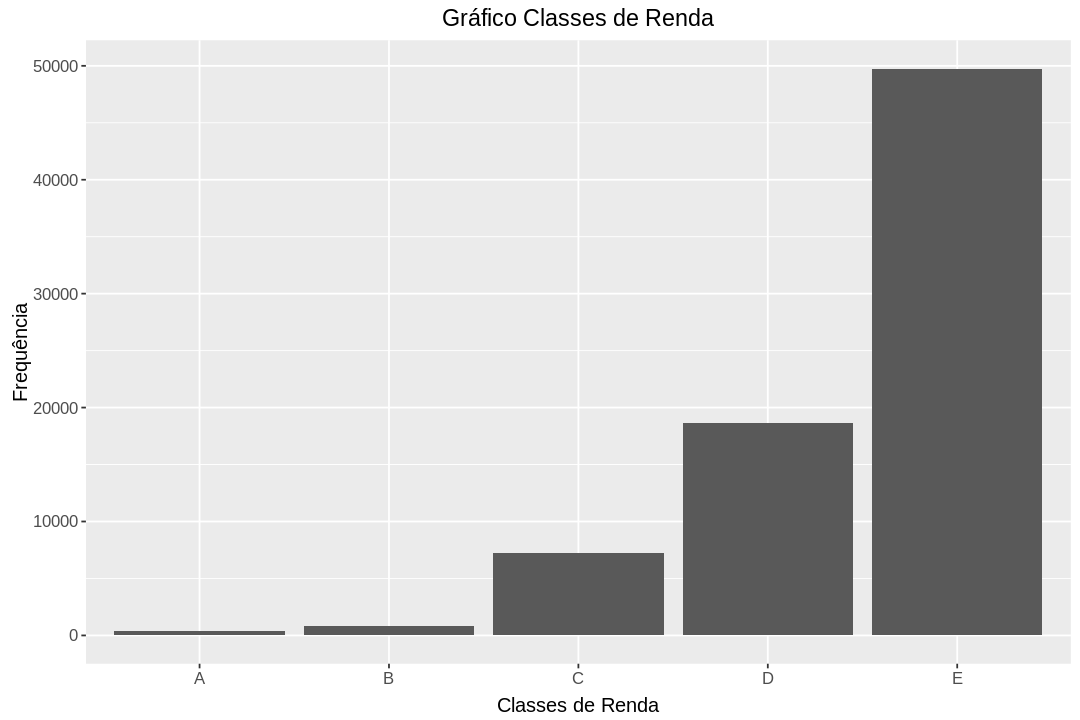

In [ ]:
ggplot(bar_chart, aes(x = row.names(bar_chart), y = Frequencia)) +
  geom_bar(stat = "identity") +
  ylab("Frequência") +
  xlab("Classes de Renda") +
  ggtitle("Gráfico Classes de Renda") +
  formatos

> ### Conclusões

A maior parte da população ganha até 2 salários mínimos. Uma quantidade minúscula da população ganha 15 SM ou mais.

### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='blue'>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



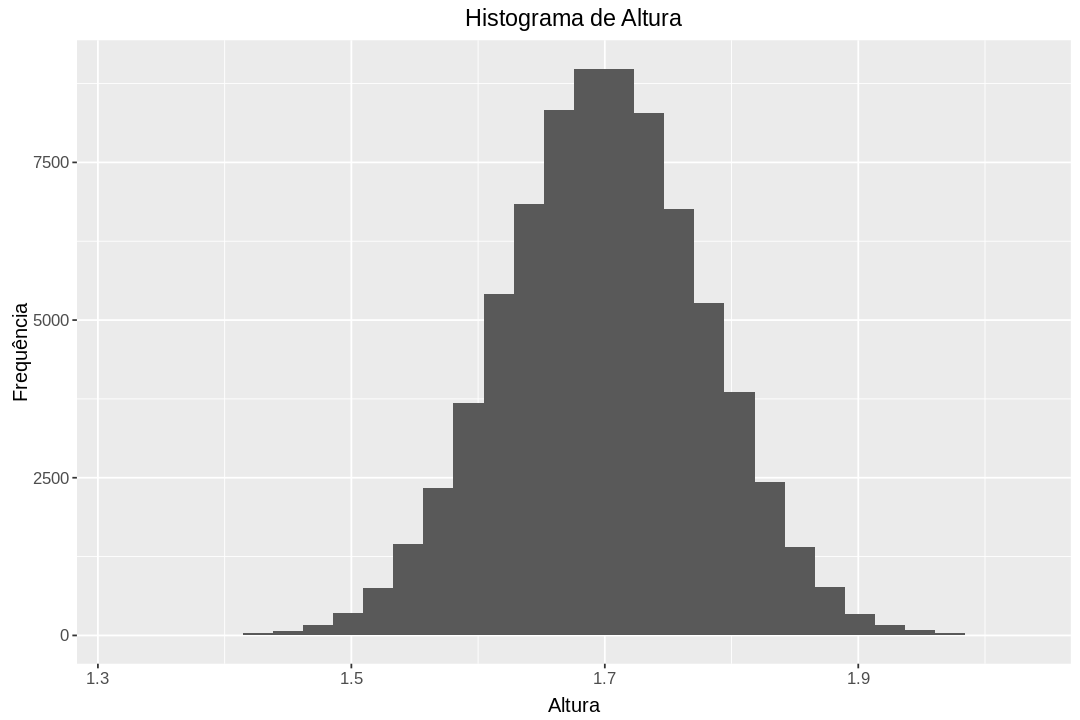

In [ ]:
ggplot(data = dados, aes(x = Altura)) +
  geom_histogram() +
  ylab("Frequência") +
  xlab("Altura") +
  ggtitle("Histograma de Altura") +
  formatos

NULL

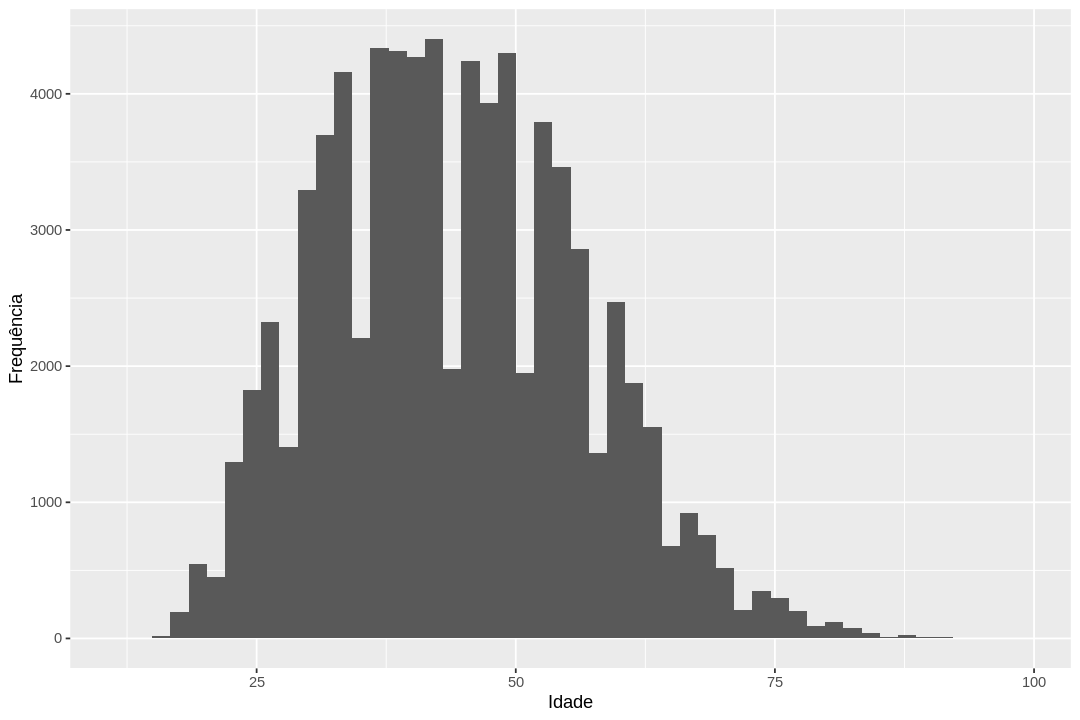

In [ ]:
ggplot(dados, aes(x = Idade)) +
geom_histogram(bins = 50) +
xlab("Idade") +
ylab("Frequência")
ggtitle("Histograma de Idade") +
formatos

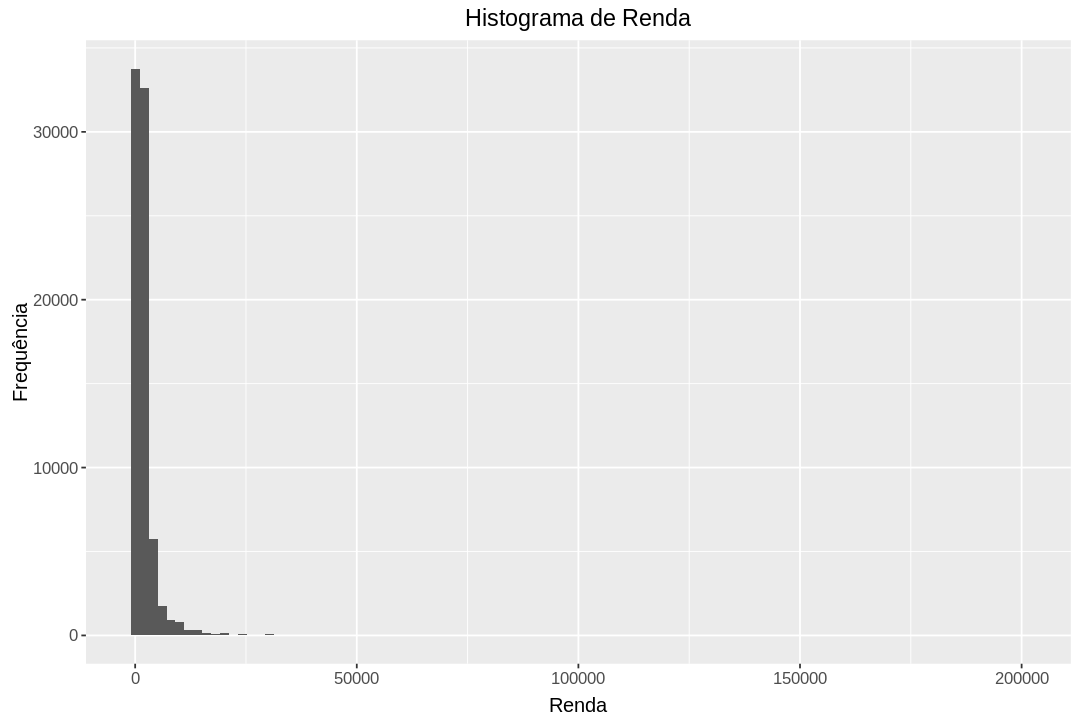

In [ ]:
ggplot(dados, aes(x = Renda)) +
  geom_histogram(bins = 100) +
  xlab("Renda") +
  ylab("Frequência") +
  ggtitle("Histograma de Renda") +
  formatos

> ### Conclusões

A maioria da população possui altura em torno de 1.70 m. O gráfico é simétrico.

O gráfico de idade possui assimetria à direita e a moda fica em torno dos 25 anos.

No gráfico de renda, a maior parte da população fica na casa de 1 SM e o gráfico é assimétrico à direita.

### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



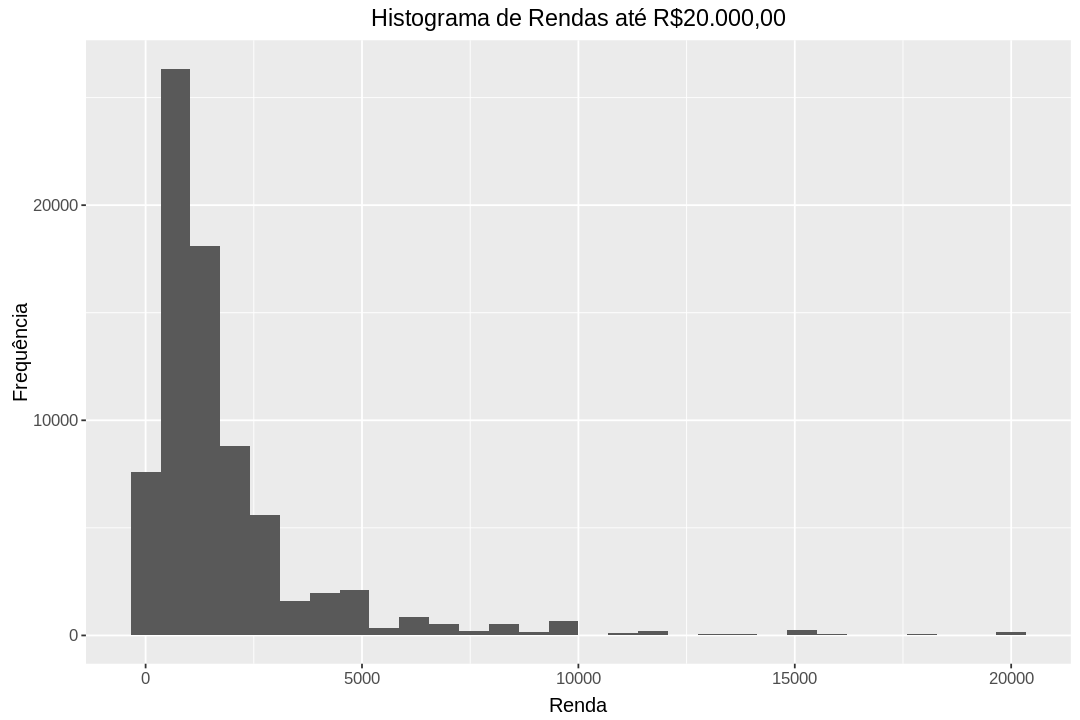

In [ ]:
ggplot(dados[dados$Renda <= 20000, ], aes(x = Renda)) +
  geom_histogram() +
  xlab("Renda") +
  ylab("Frequência") +
  ggtitle("Histograma de Rendas até R$20.000,00") +
  formatos

### Construa uma tabela de frequências e uma com os percentuais cruzando das variáveis SEXO e COR
#### <font color='blue'>Avalie o resultado da tabela e escreva suas principais conclusões</font>
#### <font color='red'>Utilize os vetores abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto</font>

In [ ]:
sexo = c(
    'Masculino', 
    'Feminino'
)
cor = c(
    'Indígena', 
    'Branca', 
    'Preta', 
    'Amarela', 
    'Parda'
)
anos_de_estudo = c(
    'Sem instrução e menos de 1 ano', 
    '1 ano', 
    '2 anos', 
    '3 anos', 
    '4 anos', 
    '5 anos', 
    '6 anos', 
    '7 anos', 
    '8 anos', 
    '9 anos', 
    '10 anos', 
    '11 anos', 
    '12 anos', 
    '13 anos', 
    '14 anos', 
    '15 anos ou mais', 
    'Não determinados'
)

In [ ]:
dados$Cat.Sexo <- factor(dados$Sexo)
levels(dados$Cat.Sexo) <- sexo

dados$Cat.Cor <- factor(dados$Cor)
levels(dados$Cat.Cor) <- cor

dados$Cat.Anos.de.Estudo <- factor(dados$Anos.de.Estudo, order = TRUE)
levels(dados$Cat.Anos.de.Estudo) <- anos_de_estudo

In [ ]:
head(dados)

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura,Cat.Sexo,Cat.Cor,Cat.Anos.de.Estudo
,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<fct>,<fct>,<ord>
1,11,0,23,8,12,800,1.603808,Masculino,Parda,11 anos
2,11,1,23,2,12,1150,1.739790,Feminino,Branca,11 anos
3,11,1,35,8,15,880,1.760444,Feminino,Parda,14 anos
4,11,0,46,2,6,3500,1.783158,Masculino,Branca,5 anos
5,11,1,47,8,9,150,1.690631,Feminino,Parda,8 anos
6,11,1,34,8,12,790,1.637906,Feminino,Parda,11 anos


In [ ]:
frequencia <- table(dados$Cat.Sexo, dados$Cat.Cor)
frequencia

           
            Indígena Branca Preta Amarela Parda
  Masculino      256  22194  5502     235 25063
  Feminino       101   9621  2889     117 10862

In [ ]:
percentual <- prop.table(frequencia) * 100
percentual

           
              Indígena     Branca      Preta    Amarela      Parda
  Masculino  0.3331598 28.8833941  7.1603332  0.3058303 32.6171265
  Feminino   0.1314420 12.5208225  3.7597605  0.1522644 14.1358667

> ### Conclusões

Os chefes de família são em sua maioria homens e a maior parte é composta de indivíduos da cor parda.

## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

In [ ]:
mean(dados$Renda)

[1] 2000.383

### Obtenha a mediana

In [ ]:
median(dados$Renda)

[1] 1200

### Obtenha a moda

In [ ]:
Moda <- function(x) {
  freq <- table(x)
  return (names(freq)[freq == max(freq)])
}

In [ ]:
as.numeric(Moda(dados$Renda))

[1] 788

### Obtenha a variância

In [ ]:
var(dados$Renda)

[1] 11044906

### Obtenha o desvio-padrão

In [ ]:
sd(dados$Renda)

[1] 3323.388

### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>Utilize *tapply* com as funções *mean*, *median* e *max*</font>

In [ ]:
media <- tapply(dados$Renda, list(dados$Cat.Sexo, dados$Cat.Cor), mean)
media

,Indígena,Branca,Preta,Amarela,Parda
Masculino,1081.711,2925.744,1603.862,4758.251,1659.577
Feminino,2464.386,2109.867,1134.596,3027.342,1176.759


In [ ]:
mediana <- tapply(dados$Renda, list(dados$Cat.Sexo, dados$Cat.Cor), median)
mediana

,Indígena,Branca,Preta,Amarela,Parda
Masculino,797.5,1700,1200,2800,1200
Feminino,788.0,1200,800,1500,800


In [ ]:
maximo <- tapply(dados$Renda, list(dados$Cat.Sexo, dados$Cat.Cor), max)
maximo

,Indígena,Branca,Preta,Amarela,Parda
Masculino,10000,200000,50000,50000,100000
Feminino,120000,100000,23000,20000,30000


> ### Conclusões

Os homens e mulheres da cor amarela possuem a maior média de renda. Os homens da cor indígena e as mulheres da cor preta possuem a menor renda média.

Tantos os homens e as mulheres da cor amarela possuem a maior renda mediana. Os homens e as mulheres da cor indígena possuem a menor renda mediana.

Os homens e mulheres da cor amarela possuem a maior moda de renda. As mulheres de todas as outras cores todas possuem moda 788 (salário mínimo).

### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>Utilize *tapply* com as funções *var* e *sd*</font>

In [ ]:
variancia <- tapply(dados$Renda, list(dados$Cat.Sexo, dados$Cat.Cor), var)
variancia

,Indígena,Branca,Preta,Amarela,Parda
Masculino,1449841,22570023,3749294,32957070,5345747
Feminino,142981765,10569087,1821960,13921657,2547960


In [ ]:
desvio_padrao <- tapply(dados$Renda, list(dados$Cat.Sexo, dados$Cat.Cor), sd)
desvio_padrao

,Indígena,Branca,Preta,Amarela,Parda
Masculino,1204.093,4750.792,1936.309,5740.825,2312.087
Feminino,11957.498,3251.013,1349.800,3731.174,1596.233


> ### Conclusões

Tantos os homens quanto as mulheres da cor amarela possuem a maior dispersão de renda.

A menor dispersão de renda está entre os homens da cor indígena e as mulheres da cor preta.

### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes;</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro *fill* da seguinte maneira: *aes(x = Cor, y = Renda, fill = Sexo)*.</font>

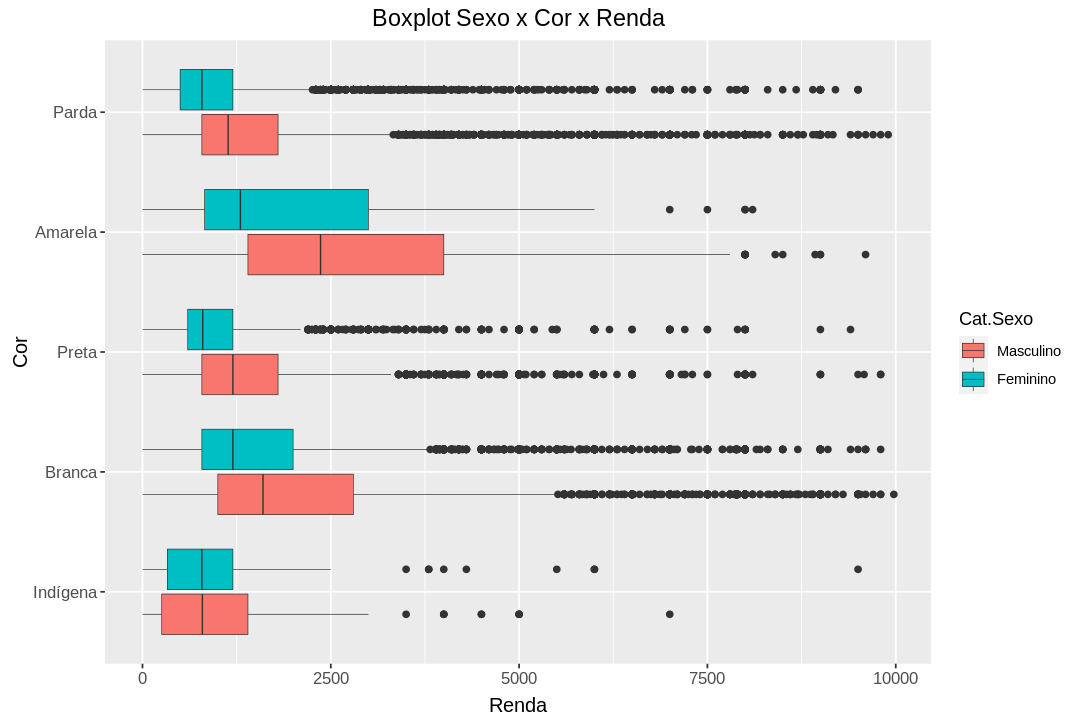

In [ ]:
ggplot(data = dados[dados$Renda < 10000, ], aes(x = Cat.Cor, y = Renda, fill = Cat.Sexo)) +
  geom_boxplot(size = 0.2) +
  coord_flip() +
  xlab("Cor") +
  ylab("Renda") +
  ggtitle("Boxplot Sexo x Cor x Renda") +
  formatos

> ### Conclusões

Em geral a mediana de renda entre homens e mulheres parece ser maior entre os homens com exceção da cor indígena.

A dispersão de renda entre homen também parece ser maior comparado com as mulheres.

A cor amarela possui a maior dispersão de renda entre todas as cores e também a maior renda mediana tanto entre homens quanto mulheres.

### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?

In [ ]:
length(dados$Renda[dados$Renda <= 788]) / length(dados$Renda) * 100

[1] 28.86778

### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método *quantile()* para realizar esta análise.</font>

In [ ]:
quantile(dados$Renda, 0.99)

99% 
15000

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>

In [ ]:
media = tapply(dados$Renda, list(dados$Cat.Anos.de.Estudo, dados$Cat.Sexo), mean)
media

,Masculino,Feminino
Sem instrução e menos de 1 ano,799.4946,516.2017
1 ano,895.6290,492.7720
2 anos,931.1790,529.9116
3 anos,1109.2039,546.8539
4 anos,1302.3293,704.2791
5 anos,1338.6532,781.3898
6 anos,1448.8754,833.7328
7 anos,1465.4979,830.7510
8 anos,1639.3967,933.6154
9 anos,1508.0389,868.0217


In [ ]:
mediana <- tapply(dados$Renda, list(dados$Cat.Anos.de.Estudo, dados$Cat.Sexo), median)
mediana

,Masculino,Feminino
Sem instrução e menos de 1 ano,700,390
1 ano,788,400
2 anos,788,450
3 anos,800,500
4 anos,1000,788
5 anos,1045,788
6 anos,1200,788
7 anos,1200,788
8 anos,1300,800
9 anos,1200,788


In [ ]:
maximo = tapply(dados$Renda, list(dados$Cat.Anos.de.Estudo, dados$Cat.Sexo), max)
maximo

,Masculino,Feminino
Sem instrução e menos de 1 ano,30000,10000
1 ano,30000,2000
2 anos,40000,4000
3 anos,80000,3500
4 anos,50000,10000
5 anos,35000,8000
6 anos,25000,6000
7 anos,40000,9000
8 anos,30000,18000
9 anos,60000,20000


In [ ]:
desvio_padrao <- tapply(dados$Renda, list(dados$Cat.Anos.de.Estudo, dados$Cat.Sexo), sd)
desvio_padrao

,Masculino,Feminino
Sem instrução e menos de 1 ano,1023.9049,639.3115
1 ano,1331.9506,425.2918
2 anos,1435.1738,498.2342
3 anos,2143.8001,424.1244
4 anos,1419.8218,629.5534
5 anos,1484.6506,635.7826
6 anos,1476.6286,574.5470
7 anos,1419.7087,602.0380
8 anos,1515.5837,896.7812
9 anos,2137.6648,973.2217


### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro *fill* da seguinte maneira: *aes(x = Anos.de.Estudo, y = Renda, fill = Sexo)*.</font>

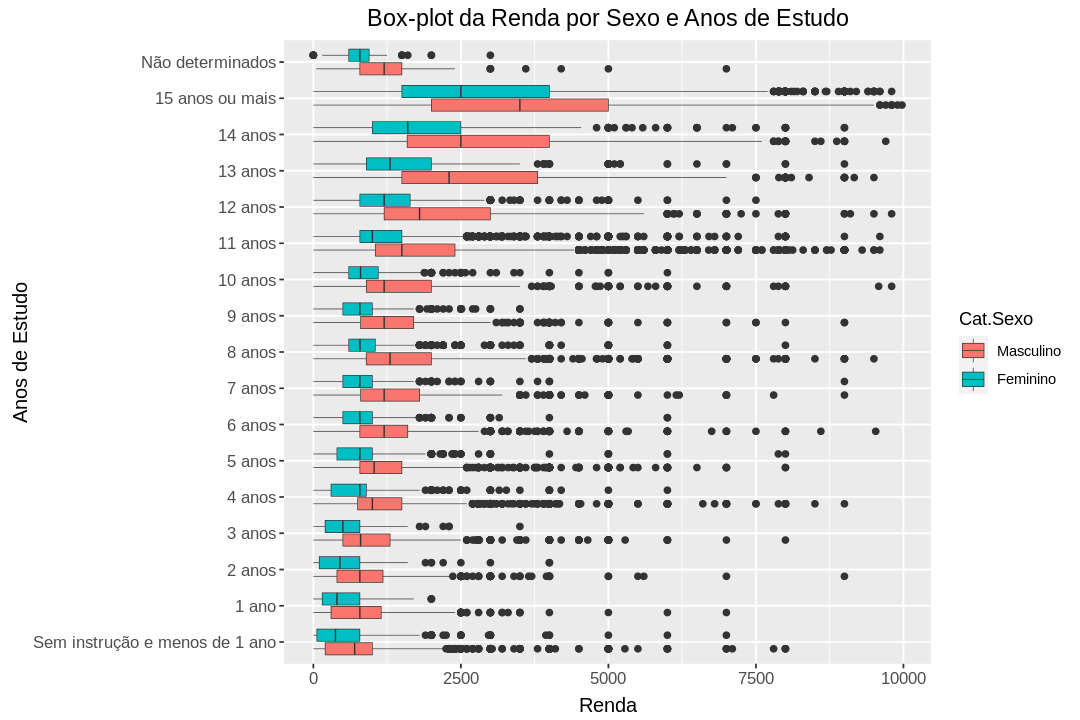

In [ ]:
ggplot(data = dados[dados$Renda < 10000, ], aes(x = Cat.Anos.de.Estudo, y = Renda, fill = Cat.Sexo)) +
  geom_boxplot(size = 0.2) +
  coord_flip() +
  ylab("Renda") +
  xlab("Anos de Estudo") +
  ggtitle('Box-plot da Renda por Sexo e Anos de Estudo') +
  formatos

> ### Conclusões

A renda aumenta com o número de anos de estudo, porém parece sempre ser maior para os homens entre homens e mulheres com a mesma quantidade de anos de estudo.